It's been a while since I've done this so I'm brushing up on my linear model skills with this notebook.


Result of fitting one dim. polynomial with numpy.polyfit and std=10:

    coeff: [  4.2453875  -13.86515031  32.75781573]
residuals: [ 1982.91835056]
     rank: 3
 singular: [ 1.67459129  0.43902844  0.05475443]
    rcond: 1.7763568394e-15
    covar: 
[[   62.94978891  -346.22383899   393.43618067]
 [ -346.22383899  1967.18090334 -2337.01091316]
 [  393.43618067 -2337.01091316  3017.65550572]]
 
Data and Fit:


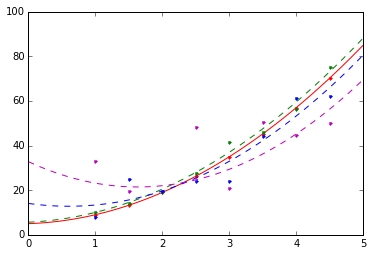

In [56]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Define a quadratic function
def noisy_quadratic(x,a,std):
    # Random normal disallows degenerate case of std = 0.
    if std <= 0.:
        std = 0.0000001
        
    y = a[0] + a[1]*x + a[2]*x**2 + np.random.normal(0,std,len(x))
    return y

# Define an independent variable 'x', coefficients for quadratic 'a'
x = np.arange(1.,5.,0.5)
a = np.array([5,1,3])

# Generate a dependent variable. 
# Our data set is now {(x,y)}
y           = []
coeff       = []
response_fn = []
for ind in range(0,4):
    std = ind*5.
    y.append(noisy_quadratic(x,a,std))

    # Use internal numpy to fit data and recover the coefficient vector 'a'
    param, residuals, rank, singular_values, rcond = np.polyfit(x, y[-1], 2, rcond=None, full=True, w=None)
    param, covar = np.polyfit(x, y[-1], 2, rcond=None, full=False, w=None, cov=True)
    coeff.append(param)
    
    # Use the recovered quadratic to approximate the real one
    response_fn.append(np.poly1d(coeff[ind]))


print ''
print 'Result of fitting one dim. polynomial with numpy.polyfit and std=10:'
print ''
print '    coeff: ' + str(coeff[-1])
print 'residuals: ' + str(residuals)
print '     rank: ' + str(rank)
print ' singular: ' + str(singular_values)
print '    rcond: ' + str(rcond)
print '    covar: '
print covar
print ' '

# Plot the data and the fit.
# # x is in (0,10) and y is in (0,270) so we'll set these as lims
xp = np.linspace(0, 5, 100)
plt.plot(x ,               y[0], '.r',
         xp, response_fn[0](xp), '-r',
         x ,               y[1],  '.g',
         xp, response_fn[1](xp), '--g',
         x ,               y[2],  '.b',
         xp, response_fn[2](xp), '--b',
         x ,               y[3],  '.m',
         xp, response_fn[3](xp), '--m')

plt.ylim(0,100)

print 'Data and Fit:'
plt.show()

[array([-1. , -0.6, -0.2,  0.2,  0.6])]
